# *Chapter 21*<br> Wave Equations I: Strings & Membranes 

| | | |
|:---:|:---:|:---:|
| ![image](Figs/Cover.png)|[From **COMPUTATIONAL PHYSICS**, 3rd Ed, 2015](http://physics.oregonstate.edu/~rubin/Books/CPbook/index.html) <br>RH Landau, MJ Paez, and CC Bordeianu (deceased) <br>Copyrights: <br> [Wiley-VCH, Berlin;](http://www.wiley-vch.de/publish/en/books/ISBN3-527-41315-4/) and [Wiley & Sons, New York](http://www.wiley.com/WileyCDA/WileyTitle/productCd-3527413154.html)<br>  R Landau, Oregon State Unv, <br>MJ Paez, Univ Antioquia,<br> C Bordeianu, Univ Bucharest, 2015.<br> Support by National Science Foundation.|![image](Figs/BackCover.png)|

**21 Wave Equations I: Strings & Membranes**<br>
[21.1 A Vibrating String](#21.1)<br>
[21.2 The Hyperbolic Wave Equation (Theory)](#21.2) <br>
 &nbsp;&nbsp;&nbsp;&nbsp;[21.2.1 Solution via Normal-Mode Expansion](#21.2.1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[21.2.2 Algorithm: Time-Stepping](#21.2.2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[21.2.3 Wave Equation Implementation](#21.2.3)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[21.2.4 Assessment, Exploration](#21.2.4)<br>
[21.3 Strings with Friction (Extension)](#21.3)<br>
[21.4 Strings with Variable Tension & Density](#21.4)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[21.4.1 Waves on Catenary](#21.4.1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[21.4.2 Derivation of Catenary Shape](#21.4.2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[21.4.3 Catenary & Frictional Wave Exercises](#21.4.3)<br>
[21.5 Vibrating Membrane (2-D Waves)](#21.5)<br>
[21.6 Analytical Solution](#21.6)<br>
[21.7 Numerical Solution for 2-D Waves](#21.7)<br>

*In this chapter and the next we explore the numerical solution of
several PDE’s that yield waves as solutions. If you have skipped the
discussion of the heat equation in* [Chapter 20, *PDE Review & Heat Flow
via Time Stepping*](CP20.ipynb),* then this chapter will be the first
example of how initial conditions are propagated forward in time with a
time-stepping or leapfrog algorithm. An important aspect of this chapter
is its demonstration that once you have a working algorithm for solving
a wave equation, you can include considerably more physics than is
possible with analytic treatments. First we deal with a number of
aspects of 1-D waves on a string, and then with 2-D waves on a membrane.
In the next chapter we look at quantum wave packets and E&M waves. In [Chapter 24](CP23.ipynb) we look at shock and solitary waves.*

** This Chapter’s Lecture, Slide Web Links, Applets & Animations**

| | |
|---|---|
|[All Lectures](http://physics.oregonstate.edu/~rubin/Books/CPbook/eBook/Lectures/index.html)|[![anything](Figs/RHLlectureMod4.png)](http://physics.oregonstate.edu/~rubin/Books/CPbook/eBook/Lectures/index.html)|

| *Lecture (Flash)*| *Slides* | *Sections*|*Lecture (Flash)*| *Slides* | *Sections*|  
|- - -|:- - -:|:- - -:|- - -|:- - -:|:- - -:| 
|[Realistic String Waves](http://physics.oregonstate.edu/~rubin/Books/CPbook/eBook/Lectures/Modules/String/String.html)|[pdf](http://physics.oregonstate.edu/~rubin/Books/CPbook/eBook/Lectures/Slides/Slides_NoAnimate_pdf/WavesStrings_08July.pdf)| 18.1| [Catenary Waves](http://physics.oregonstate.edu/~rubin/Books/CPbook/eBook/Lectures/Modules/Cat_Friction/Cat_Friction.html)|[pdf](http://physics.oregonstate.edu/~rubin/Books/CPbook/eBook/Lectures/Slides/Slides_NoAnimate_pdf/WavesStrings_08July.pdf)|18.3| 
|[Quantum WavePackets](http://science.oregonstate.edu/~rubin/Books/CPbook/eBook/VideoLecs/Quant_Waves/Quant_Waves.html)| [pdf](http://physics.oregonstate.edu/~rubin/Books/CPbook/eBook/Lectures/Slides/Slides_NoAnimate_pdf/WavesQuantum.pdf)|18.5 | [EM Waves (FDTD)](http://physics.oregonstate.edu/~rubin/Books/CPbook/eBook/Lectures/Modules/FDTD/FDTD.html)|[pdf](http://physics.oregonstate.edu/~rubin/Books/CPbook/eBook/Lectures/Slides/Slides_NoAnimate_pdf/FDTD.pdf)|22.5|
|[Cat with Friction Applet](http://science.oregonstate.edu/~rubin/Books/CPbook/eBook/Movie/CatFrictionAnimate.mov)|-|21.4|[Waves on a String Applet](http://science.oregonstate.edu/~rubin/Books/CPbook/eBook/Applets/index.html)|-| 18.1-18.2 | 
|[String normal mode](http://science.oregonstate.edu/~rubin/Books/CPbook/eBook/Applets/index.html)|-|18.1-18.2 |[Two peaks on a String Applet](http://science.oregonstate.edu/~rubin/Books/CPbook/eBook/Applets/index.html)|-| 18.1-18.2|
|[Catenary Wave Movie](http://science.oregonstate.edu/~rubin/Books/CPbook/eBook/Movies/CatFrictionAnimate.mov)|-|18.4|[Wavepacket-Wavepacket Scattering Movies](http://science.oregonstate.edu/~rubin/Books/CPbook/eBook/Movies/PacketPackerSymmetrymov.mp4)|-|18.5-18.7 |
|[Wavepacket Slit Movie](http://science.oregonstate.edu/~rubin/Books/CPbook/eBook/Movies/slitsmall.mpeg)|-| 18.5-18.7| [Square Well Applet](http://science.oregonstate.edu/~rubin/Books/CPbook/eBook/Applets/index.html)|-|18.6 |
|[Harmonic Oscillator](http://science.oregonstate.edu/~rubin/Books/CPbook/eBook/Applets/index.html)|-|18.7|[Two Slit Interference](http://science.oregonstate.edu/~rubin/Books/CPbook/eBook/Movies/2slits.mp4)|-|18.8|

## 21.1  A Vibrating String <a id="21.1"></a>

**Problem:** Recall the demonstration from elementary physics in which a
string tied down at both ends is plucked “gently” at one location and a
pulse is observed to travel along the string. Likewise, if the string
has one end free and you shake it just right, a standing-wave pattern is
set up in which the nodes remain in place and the antinodes move just up
and down. Your **problem** is to develop an accurate model for wave
propagation on a string, and to see if you can set up traveling- and
standing-wave patterns.\[*Note:* Some similar but independent studies
can also be found in \[[Rawitscher et al.(96)](BiblioLinked.html#raw)\].\]

## 21.2  The Hyperbolic Wave Equation (Theory) <a id="21.2"></a>

Consider a string of length $L$ tied down at both ends (Figure 21.1
left). The string has a constant density $\rho$ per unit length, a
constant tension $T$, no frictional forces acting on it, and a tension
that is so high that we may ignore sagging as a result of gravity. We
assume that displacement of the string from its rest position $y(x,t)$
is in the vertical direction only and that it is a function of the
horizontal location along the string $x$ and the time $t$.

|A|B|
|:- - -:|:- - -:|
|![image](Figs/Fig21_1a.png)|![image](Figs/Fig21_1b.png)|

 **Figure 21.1** *A:* A stretched string of length $\textit{L}$ tied down at both ends
and under high enough tension so that we can ignore gravity. The vertical
disturbance of the string from its equilibrium position is
$\textit{y}(\textit{x},\textit{t})$. *B:* A differential element of the string
showing how the string’s displacement leads to the restoring force.

To obtain a simple linear equation of motion (nonlinear wave equations are
discussed in [Chapters 24, *Shock Waves & Solitons*](CP24.ipynb), and [25,
*Fluid Dynamics*](CP25.ipynb)) we assume that the string’s relative
displacement $y(x,t)/L$ and slope $\partial y/\partial x$ are small. We isolate an
infinitesimal section $\Delta x$ of the string (Figure 21.1 right) and see that the
difference in the vertical components of the tension at either end of the string
produces the restoring force that accelerates this section of the string in the
vertical direction. By applying Newton’s laws to this section, we obtain the
familiar wave equation:

$$\begin{align} \tag*{21.1}
\sum F_y &= \rho \Delta x \frac{\partial^2 y}{\partial t^2}\\
& = T\sin\theta(x+\Delta x) - T\sin\theta(x)\\ 
& = T \left. \frac{\partial y}{\partial x}\right|_{x+\Delta x} 
- T \left.\frac{\partial y}{\partial x}\right|_x \simeq T \frac{\partial^2
y}{\partial x^2}, \tag*{21.3} \\
\Rightarrow \quad \frac{\partial^2 y(x,t)}{\partial x^2} & =
\frac{1}{c^2} \frac{\partial^2 y(x,t)}{\partial t^2}, \quad c  =
 \sqrt{\frac {T}{\rho}}, \tag*{21.4}
\end{align}$$
 
where we have assumed
that $\theta$ is small enough for
$\sin\theta \simeq \tan\theta =\partial y/\partial x$.The existence of
two independent variables $x$ and $t$ makes this a PDE. The constant $c$
is the velocity with which a disturbance travels along the wave, and is
seen to decrease for a denser string and increase for a tighter one.
Note that this signal velocity $c$ is *not* the same as the velocity of
a string element $\partial y/\partial t$.

The initial condition for our problem is that the string is plucked
gently and released. We assume that the “pluck” places the string in a
triangular shape with the center of triangle $\frac {8}{10}$ of the way
down the string and with a height of $1$:

$$\tag*{21.5}
 y(x,t=0)=\begin{cases}
 1.25 x/L , &x\leq 0.8 L ,\\
 (5-5x/L), &x> 0.8 L,
 \end{cases} \quad \mbox{(initial condition 1)} .$$

Because (21.4) is second-order in time, a second initial condition
(beyond initial displacement) is needed to determine the solution. We
interpret the “gentleness” of the pluck to mean the string is released
from rest:

$$\tag*{21.6}
\frac{\partial y} {\partial t}(x,t=0) =0,\quad \mbox{(initial
condition 2)}.$$

The boundary conditions have both ends of the string tied down for all
times:

$$\tag*{21.7} y(0,t) \equiv 0, \quad y(L,t) \equiv 0,\quad \mbox{(boundary
conditions).}$$

### 21.2.1  Solution via Normal-Mode Expansion <a id="21.2.1"></a>
[![image](Figs/Javaapplet4.png) Vibrating Spring](http://science.oregonstate.edu/~rubin/Books/CPbook/eBook/Applets/index.html)

The analytic solution to (21.4) is obtained via the familiar
separation-of-variables technique. We assume that the solution is the
product of a function of space and a function of time:

$$\tag*{21.8} y(x,t) = X(x)T(t).$$

We substitute (21.8) into (21.4), divide by $y(x,t)$, and are left with
an equation that has a solution only if there are solutions to the two
ODE’s:

$$\tag*{21.9}
\frac{d^2 T(t)}{dt^2} +\omega^2 T(t) = 0, \quad \frac{d^2
X(x)}{dx^2} +k^2 X(x) = 0,\quad k { = } \frac{\omega}{c}.$$

The angular frequency $\omega$ and the wave vector $k$ are determined by
demanding that the solutions satisfy the boundary conditions.
Specifically, the string being attached at both ends demands

$$\begin{align}
\tag*{21.10}
& X(x=0,t) = X(x=l,t)=0 \\
\Rightarrow \quad X_n(x) =&  A_n \sin {k_n x}, \quad k_n = \frac
{\pi (n+1) } {L}, \quad n = 0, 1, \ldots.\tag*{21.11}\end{align}$$

The time solution is

$$\tag*{21.12} T_n(t) = C_n \sin \omega_n t + D_n \cos \omega_n t, \quad
\omega_n = n  c k_0 = n \frac{2\pi c}{L},$$

where the frequency of this $n$th *normal mode* is also fixed. In fact,
it is the single frequency of oscillation that defines a normal mode.
The *initial condition* (21.5) of zero velocity,
$\partial y/\partial t (t=0)
=0$, requires the $C_n$ values in (21.12) to be zero. Putting the pieces
together, the normal-mode solutions are

$$\tag*{21.13} y_n(x,t)= \sin k_nx \cos \omega_n t, \quad n=0, 1,
\ldots\ .$$

![image](Figs/Fig21_2.png) 

**Figure 21.2** The solutions of the wave
equation for four earlier space-time points are used to obtain the
solution at the present time. The boundary and initial conditions are
indicated by the white-centered dots.

Because the wave equation (21.4) is linear in $y$, the principle of
linear superposition holds and the most general solution for waves on a
string with fixed ends can be written as the sum of normal modes:

$$\tag*{21.14} y(x,t)= \sum_{n=0}^\infty B_n \sin k_nx \cos \omega_n t.$$

(Yet we will lose linear superposition once we include nonlinear terms in the
wave equation.) The Fourier coefficient $B_n$ is determined by the second
initial condition (21.5), which describes how the wave is plucked:

$$\tag*{21.15} y(x,t=0)= \sum_n^\infty B_n \sin nk_0x .$$

We multiply both sides by $\sin mk_0 x$, substitute the value of
$y(x,0)$ from (21.5), and integrate from 0 to $l$ to obtain

$$\tag*{21.16} B_m= 6.25 \;\frac{\sin(0.8 m\pi)} {m^2 \pi^2}.$$

You will be asked to compare the Fourier series (21.14) to our numerical
solution. While it is in the nature of the approximation that the
precision of the numerical solution depends on the choice of step sizes,
it is also revealing to realize that the precision of the so-called
analytic solution depends on summing an infinite number of terms, which
can be carried out only approximately.

### 21.2.2  Algorithm: Time-Stepping<a id="21.2.2"></a>

As with Laplace’s equation and the heat equation, we look for a solution $y(x,t)$
only for discrete values of the independent variables $x$ and $t$ on a grid
(Figure 21.2):

$$\begin{align} \tag*{21.17}
x &=i \Delta x, \quad i = 1, \ldots, N_x, \quad t = j \Delta t, \quad j = 1, \ldots,
N_t,\\
y(x,t) &= y(i\Delta x,\ i\Delta t) = y_{i,j}.\tag*{21.18}\end{align}$$ 

In
contrast to Laplace’s equation where the grid was in two space dimensions, the
grid in Figure 21.2 is in both space and time. That being the case, moving across
a row corresponds to increasing $x$ values along the string for a fixed time,
while moving down a column corresponds to increasing time steps for a fixed
position. Although the grid in Figure 21.2 may be square, we cannot use a
relaxation technique like we did for the solution of Laplace’s equation because
we do not know the solution on all four sides. The boundary conditions
determine the solution along the right and left sides, while the initial time
condition determines the solution along the top.

As with the Laplace equation, we use the central-difference
approximation to *discretize* the wave equation into a difference
equation. First we express the second derivatives in terms of finite
differences:

$$\tag*{21.19}
\frac{\partial^2 y }{\partial t^2} \simeq
\frac{y_{i,j+1}+y_{i,j-1}-2 y_{i,j}}{(\Delta t)^2}, \quad
\frac{\partial^2 y}{\partial x^2} \simeq \frac{y_{i+1,j}
+y_{i-1,j}-2 y_{i,j}} {(\Delta x)^2}.$$

Substituting (21.19) in the wave equation (21.4) yields the difference
equation

$$\tag*{21.20}
\frac{y_{i,j+1}+y_{i,j-1}-2 y_{i,j}} {c^2 (\Delta t)^2}  =
\frac{y_{i+1,j}+y_{i-1,j}-2 y_{i,j}} {(\Delta x)^2}.$$

Notice that this equation contains three time values: $j+1 = $ the
future, $j  = $ the present, and $j - 1 = $ the past. Consequently, we
rearrange it into a form that permits us to predict the future solution
from the present and past solutions:

$$\tag*{21.21}
   y_{i,j+1}  = 2 y_{i,j}-y_{i,j-1}+ \frac{c^2 }
{c'^{2}} \left [ y_{i+1,j}+y_{i-1,j}-2 y_{i,j}\right], \quad c'
{ = } \frac {\Delta x}{\Delta t}.$$

Here $c'$ is a combination of numerical parameters with the dimension of
velocity whose size relative to $c$ determines the stability of the
algorithm. The algorithm (21.21) propagates the wave from the two
earlier times, $j$ and $j-1$, and from three nearby positions, $i-1$,
$i$, and $i+1$, to a later time $j+1$ and a single space position $i$
(Figure 21.2).

![image](Figs/Fig21_2.png)

**Figure 21.2** The solutions of the wave equation for four earlier space-time
points are used to obtain the solution at the present time. The boundary and
initial conditions are indicated by the white-centered dots.

As you have seen in our discussion of the heat equation, a leapfrog
method is quite different from a relaxation technique. We start with the
solution along the topmost row and then move down one step at a time. If
we write the solution for present times to a file, then we need to store
only three time values on the computer, which saves memory. In fact,
because the time steps must be quite small to obtain high precision, you
may want to store the solution only for every fifth or tenth time.

Initializing the recurrence relation is a bit tricky because it requires
displacements from two earlier times, whereas the initial conditions are
for only one time. Nonetheless, the rest condition (21.5) when combined
with the *central-difference* approximation lets us extrapolate to
negative time:

$$\tag*{21.22}
\frac{\partial y}{\partial t}(x,0) \simeq \frac{y(x, \Delta t)- y(x,
-\Delta t)}{2\Delta t}=0, \ \Rightarrow \ y_{i, 0} = y_{i,2}.$$

Here we take the initial time as $j=1$, and so $j=0$ corresponds to
$t=-\Delta t$. Substituting this relation into (21.21) yields for the
initial step

$$\tag*{21.23} y_{i,2} = y_{i,1}+ \frac{c^2} {2c'^2} \left [ y_{i+1,1}+y_{i-1,1}-2
y_{i,1}\right] \quad (\mbox{for $j=2$ only}).$$

Equation (21.23) uses the solution throughout all space at the initial
time $t=0$ to propagate (leapfrog) it forward to a time $\Delta t$.
Subsequent time steps use (21.21) and are continued for as long as you
like.

As is also true with the heat equation, the success of the numerical method
depends on the relative sizes of the time and space steps. If we apply a von
Neumann stability analysis to this problem by substituting $y_{m,j} = \xi^j\exp(i
k m\ \Delta x)$, as we did in §20.2.3, a complicated equation results.
Nonetheless, \[[Press et al.(94)](BiblioLinked.html#press)\] shows that the difference-equation solution will
be stable for the general class of transport equations if \[[Courant et al.(28)](BiblioLinked.html#cour)\]

$$\begin{align}
\tag*{21.24}
c \leq c' = {\Delta x }/ {\Delta t} \quad\mbox{(Courant condition)}.\end{align}$$

Equation (21.24) means that the solution gets better with smaller *time* steps
but gets worse for smaller space steps (unless you simultaneously make the time
step smaller). Having different sensitivities to the time and space steps may
appear surprising because the wave equation (21.4) is symmetric in $x$ and
$t$, yet the symmetry is broken by the nonsymmetric initial and boundary
conditions.

**Exercise:** Figure out a procedure for solving for the wave equation
for all times in just one step. Estimate how much memory would be
required.

![image](Figs/Fig21_3.png)

**Figure 21.3** The vertical displacement as a function of position $x$ and time
$t$ for a string with friction placed initially in a standing mode (Courtesy of J.
Wiren.)

**Exercise:** Try to figure out a procedure for solving for the wave
motion with a relaxation technique. What would you take as your initial
guess, and how would you know when the procedure has converged?

### EqStringAnimate.py, Notebook Version

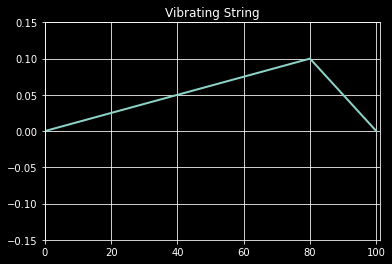

finished


In [1]:
#### EqStringAnimate.py, Notebook Version, Vibrating string + MatPlotLib

from numpy import *
import numpy as np
import matplotlib.pyplot as plt
#import scipy.integrate as integrate
import matplotlib.animation as animation

# Parameters
rho = 0.01                                                # string density
ten = 40.                                                  # string tension
c = sqrt(ten/rho)                                       # Propagation speed
c1 = c                                                      # CFL criterium
ratio =  c*c/(c1*c1)
# Initialization
xi = np.zeros( (101, 3), float)                            # 101 x's & 3 t's 
k=range(0,101)
def init():
    for i in range(0, 81):
        xi[i, 0] = 0.00125*i          # Initial condition: string plucked,shape
    for i in range (81, 101):                           # first part of string
        xi[i, 0] = 0.1 - 0.005*(i - 80)                 # second part of string
         
init()                                         # plot string initial position   
fig=plt.figure()                           # figure to plot (a changing line)
# select axis; 111: only one plot, x,y, scales given
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, 101), ylim=(-0.15, 0.15))
ax.grid()                                                       # plot a grid
plt.title("Vibrating String")
line, = ax.plot(k, xi[k,0], lw=2)             # x axis, y values, linewidth=2     

# Later time steps
for i in range(1, 100):                                      # use  algorithm
    xi[i, 1] = xi[i, 0] + 0.5*ratio*(xi[i + 1, 0] + xi[i - 1, 0] - 2*xi[i, 0])   

def animate(num):               #num: dummy,  algorithm, will plot (x, xi)            
    for i in range(1, 100):              
        xi[i,2] = 2.*xi[i,1]-xi[i,0]+ratio*(xi[i+1,1]+xi[i-1,1]-2*xi[i,1])
    line.set_data(k,xi[k,2])                              # data to plot ,x,y           
    for m in range (0,101):                               # part of algorithm
        xi[m, 0] = xi[m, 1]                                    # recycle array 
        xi[m, 1] = xi[m, 2]
    return line,
# next: animation(figure, function,dummy argument: 1      
ani = animation.FuncAnimation(fig, animate,1)           
plt.show()             
print("finished")

### 21.2.3  Wave Equation Implementation<a id="21.2.3"></a>

The program `EqStringAnimate.py` in Listing 21.1 solves the wave
equation for a string of length $L=1$ m with its ends fixed and with the
gently plucked initial conditions. Note that our use of $L=1$ violates
our assumption that $y/L\ll 1$ but makes it easy to display the results;
you should try $L=1000$ to be realistic. The values of density and
tension are entered as constants, $\rho=0.01 \mbox{kg/m}$ and
$T=40 \mbox{N}$, with the space grid set at 101 points, corresponding to
$\Delta=0.01 $cm.

[**Listing 21.1  EqStringAnimate.py**](http://www.science.oregonstate.edu/~rubin/Books/CPbook/Codes/Animations/VEqStringAnimat.py) solves the wave equation via time
stepping for a string of length $\textit{L}=1$ m with its ends fixed and with the
gently plucked initial conditions. You will need to modify this code to include
new physics.

### 21.2.4  Assessment, Exploration<a id="21.2.4"></a>

 ![image](Figs/Fig21_4.png)

**Figure 21.4** The vertical displacement as a function of position and time of a string initially plucked
    simultaneously at two points, as shown by arrows. Note that each
    initial peak breaks up into waves traveling to the right and to
    the left. The traveling waves invert on reflection from the
    fixed ends. As a consequence of these inversions, the
    $\textit{t}\simeq \text{12}$ wave is an inverted
    $\textit{t}=\text{0}$ wave.
    
1.  Solve the wave equation and make a surface plot of displacement
    *versus* time and position.

2.  Explore a number of space and time step combinations. In particular,
    try steps that satisfy and that do not satisfy the Courant
    condition (21.24). Does your exploration confirm the stability
    condition?

3.  Compare the analytic and numeric solutions, summing at least 200
    terms in the analytic solution.

4.  Use the plotted time dependence to estimate the peak’s propagation
    velocity $c$. Compare the deduced $c$ to (21.4).

5.  Our solution of the wave equation for a plucked string leads to the
    formation of a wave packet that corresponds to the sum of multiple
    normal modes of the string. On the right in Figure 21.3 we show the
    motion resulting from the string initially placed in a single normal
    mode (standing wave),

    $$\tag*{21.25}
    y(x,t=0) =  0.001  \sin 2\pi x, \quad\frac{\partial y}{\partial
    t}(x,t=0) =0,$$

    and with friction (to be discussed soon) included.

    Modify your program to incorporate this initial condition and see if
    a normal mode results.

6.  Observe the motion of the wave for initial conditions corresponding
    to the sum of two adjacent normal modes. Does beating occur?

7.  When a string is plucked near its end, a pulse reflects off the ends
    and bounces back and forth. Change the initial conditions of the
    model program to one corresponding to a string plucked exactly in
    its middle and see if a traveling or a standing wave results.

8.  Figure 21.4 shows the wave packets that result as a function of time
    for initial conditions corresponding to the double pluck indicated
    on the left in the figure. Verify that initial conditions of the
    form

    $$\tag*{21.26}
    \frac{y(x,t=0)}{0.005} =\begin{cases}
     0, &                0.0\leq x \leq 0.1 ,        \\
            10x -1, &        0.1 \leq        x \leq 0.2 ,\\
     -10x +3, &          0.2 \leq x \leq 0.3 , \\
     0, &                0.3 \leq x \leq 0.7 , \\
            10x -7 , &          0.7\leq x\leq 0.8 , \\
            -10x +9, &          0.8\leq x \leq 0.9 ,\\
     0, & 0.9 \leq x\leq 1.0
     \end{cases}$$

    lead to this type of a repeating pattern. In particular, observe
    whether the pulses move or just oscillate up and down.

## 21.3  Strings with Friction (Extension) <a id="21.3"></a>

*The string problem we have investigated so far can be handled by either
a numerical or an analytic technique. We now wish to extend the theory
to include some more realistic physics. These extensions have only
numerical solutions.*

Plucked strings do not vibrate forever because there is friction in the
real world. Consider again the element of a string between $x$ and
$x + dx$ (Figure 21.1 right) but now imagine that this element is moving
in a viscous fluid such as air. An approximate model for the frictional
force has it pointing in a direction opposite the vertical velocity of
the string and proportional to that velocity, as well as proportional to
the length of the string element:

$$\tag*{21.27} F_f \simeq -2\kappa\ \Delta x\ \frac{\partial y} {\partial t},$$

where $\kappa$ is a constant that is proportional to the viscosity of the medium
in which the string is vibrating. Including this force in the equation of motion
changes the wave equation to 

$$\begin{align}
\tag*{21.28}
\frac{\partial^2y}{\partial t^2}= c^2  \frac{\partial^2
y}{\partial x^2} - \frac{2\kappa}{\rho} \frac{\partial y}{\partial t} .\end{align}$$

In Figure 21.3 we show the resulting motion of a string plucked in the middle
when friction is included. Observe how the initial pluck breaks up into waves
traveling to the right and to the left that are reflected and inverted by the fixed
ends. Because those parts of the wave with the higher velocity experience
greater friction, the peak tends to be smoothed out the most as time
progresses.

**Exercise:** Generalize the algorithm used to solve the wave equation
to now include friction and check if the wave’s behavior seems physical
(damps in time). Start with $T=40 \mbox{N}$ and $\rho=10 \mbox{kg/m}$,
and pick a value of $\kappa$ large enough to cause a noticeable effect
but not so large as to stop the oscillations. As a check, reverse the
sign of $\kappa$ and see if the wave grows in time (which would
eventually violate our assumption of small oscillations).

## 21.4  Strings with Variable Tension & Density <a id="21.4"></a>

We have derived the propagation velocity for waves on a string as
$c=\sqrt{T/\rho}$. This says that waves move slower in regions of high
density and faster in regions of high tension. If the density of the
string varies, for instance, by having the ends thicker in order to
support the weight of the middle, then $c$ will no longer be a constant
and our wave equation will need to be extended. In addition, if the
density increases, then so will the tension because it takes greater
tension to accelerate a greater mass. If gravity acts, then we will also
expect the tension at the ends of the string to be higher than in the
middle because the ends must support the entire weight of the string.

To derive the equation for wave motion with variable density and
tension, consider again the element of a string (Figure 21.1 right) used
in our derivation of the wave equation. If we do not assume the tension
$T$ is constant, then Newton’s second law gives

$$\begin{align}
\tag*{21.29}
F & = m a \\
\Rightarrow \quad \frac{\partial}{\partial x}\left[T(x)
\frac{\partial y(x,t)}{\partial x}\right]\Delta x & = \rho(x)\Delta
x \frac{\partial^2 u(x,t)} {\partial t^2}\tag*{21.30}\end{align}$$

$$\begin{align}
\tag*{21.31}
\Rightarrow \quad \frac{\partial
T(x)}{\partial x}  \frac{\partial y(x,t)}{\partial x} +T(x)
 \frac{\partial^2 y(x,t)}{\partial x^2}=\rho(x)
\frac{\partial^2 y(x,t)}{\partial
t^2}.\end{align}$$

If $\rho(x)$ and $T(x)$ are known functions, then these equations can be
solved with just a small modification of our algorithm.

In §21.4.1 we will solve for the tension in a string as a result of
gravity. Readers interested in an **alternate easier problem** that
still shows the new physics may assume that the density and tension are
proportional:

$$\tag*{21.32}
\rho(x) =\rho_0 e^{\alpha x}, \quad T(x) = T_0 e^{\alpha x}.$$

While we would expect the tension to be greater in regions of higher
density (more mass to move and support), being proportional is clearly
just an approximation. Substitution of these relations into (21.31)
yields the new wave equation:

$$\tag*{21.33}
\frac{\partial^2 y(x,t)}{\partial x^2} +  \alpha  \frac{\partial
y(x,t)}{\partial x} = \frac{1}{c^2}  \frac{\partial^2
y(x,t)}{\partial t^2},\quad c^2 = \frac{T_0}
{\rho_0}.$$

Here $c$ is a constant that would be the wave velocity if $\alpha=0$.
This equation is similar to the wave equation with friction, only now
the first derivative is with respect to $x$ and not $t$. The
corresponding difference equation follows from using central-difference
approximations for the derivatives:

$$\begin{align} y_{i,j+1} & = 2y_{i,j}-y_{i,j-1} + \frac{\alpha c^2 (\Delta t)^2 }
{2\Delta x} [ y_{i+1,j}- y_{i,j}] + \frac{c^2} { c'^2} [y_{i+1,j}+y_{i-1,j}-2y_{i,j}], \\ 
y_{i,2} & = y_{i,1}+ \frac{c^2}{c'^2}[y_{i+1,1}+y_{i-1,1} -2y_{i,1}]  + \frac{\alpha c^2
(\Delta t)^2 } {2\Delta x}[y_{i+1,1}-y_{i,1}].\tag*{21.34}\end{align}$$

### 21.4.1  Waves on Catenary<a id="21.4.1"></a>

Up until this point we have been ignoring the effect of gravity upon our
string’s shape and tension. This is a good approximation if there is
very little sag in the string, as might happen if the tension is very
high and the string is light. Even if there is some sag, our solution
for $y(x,t)$ could still be used as the disturbance about the
equilibrium shape. However, if the string is massive, say, like a chain
or heavy cable, then the sag in the middle caused by gravity could be
quite large (Figure 21.5), and the resulting variation in shape and
tension needs to be incorporated into the wave equation. Because the
tension is no longer uniform, waves travel faster near the ends of the
string, which are under greater tension because they must support the
entire weight of the string.

![image](Figs/Fig21_5.png)

 **Figure 21.5** *Top:* A uniform string
suspended from its ends in a gravitational field assumes a catenary
shape. *Bottom:* A force diagram of a section of the catenary at its
lowest point. Because the ends of the string must support the entire
weight of the string, the tension now varies along the string.

### 21.4.2  Derivation of Catenary Shape<a id="21.4.2"></a>

Consider a string of uniform density $\rho$ acted upon by gravity. To avoid
confusion with our use of $y(x)$ to describe a disturbance on a string, we call
$u(x)$ the equilibrium shape of the string (Figure 21.5). The statics problem we
need to solve is to determine the shape $u(x)$ and the tension $T(x)$. The inset
in Figure 21.5 is a free-body diagram of the midpoint of the string and shows
that the weight $W$ of this section of arc length $s$ is balanced by the vertical
component of the tension $T$. The horizonal tension $T_0$ is balanced by the
horizontal component of $T$:

 $$\begin{align}
\tag*{21.35}
T(x)\sin\theta & = W = \rho g s, \quad T(x)\cos\theta = T_0,\\
\Rightarrow \quad \tan\theta & =  {\rho g s} /{T_0}. \tag*{21.36}\end{align}$$

The trick is to convert (21.35) to a differential equation that we can solve. We
do that by replacing the slope $\tan\theta$ by the derivative $du/dx$, and
taking the derivative with respect to $x$:

$$\begin{align}
\tag*{21.37}
\frac{du}{dx} =\frac{\rho g} {T_0} s, \quad \Rightarrow\quad
\frac{d^2u} {dx^2} = \frac {\rho g} {T_0}  \frac{ds} {dx}.\end{align}$$

Yet because $ds = \sqrt{dx^2+du^2}$, we have our differential equation

$$\begin{align}
\tag*{21.38}
\frac{d^2u} {dx^2}  & = \frac{1} {D} \frac{\sqrt{dx^2+du^2}} {dx}
= \frac{1} {D} \sqrt{1+ \left( \frac{du}{dx}\right)^2},\\
 D & =   {T_0 / \rho g},\tag*{21.39}\end{align}$$ 
 
where $D$ is a
combination of constants with the dimension of length. Equation (21.38) is the
equation for the *catenary* and has the solution \[[Becker(54)](BiblioLinked.html#becker)\] 

$$\tag*{21.40}
  u(x) = D \cosh \frac{x} {D}.$$

Here we have chosen the $x$ axis to lie a distance $D$ below the bottom
of the catenary (Figure 21.5) so that $x=0$ is at the center of the
string where $y=D$ and $T=T_0$. Equation (21.37) tells us the arc length
$s= D du/dx$, so we can solve for $s(x)$ and for the tension $T(x)$ via
(21.35):

$$\tag*{21.41} s(x) = D \sinh \frac{x} {D},\quad\Rightarrow\quad T(x) = T_0
\frac{ds} {dx} = \rho g u(x) = T_0 \cosh
\frac{x}{D}.$$

It is this variation in tension that causes the wave velocity to change
for different positions on the string.

### 21.4.3 Catenary and Frictional Wave Exercises<a id="21.4.3"></a>

![image](Figs/Projector.png)[Movie of wave motion of a plucked catenary with friction.](http://science.oregonstate.edu/~rubin/Books/CPbook/eBook/Movies/CatFrictionAnimate.mp4)


![image](Figs/Fig21_6.png)
**Figure 21.6** The wave motion of a
    plucked catenary with friction. (Courtesy of Juan Vanegas.)
    
We have given you the program `EqStringAnimate.py` (Listing 21.1) that
solves the wave equation. Modify it to produce waves on a catenary
including friction for the assumed density and tension given by (21.32)
with $\alpha
= 0.5$, $T_0=40$ N, and $\rho_0=0.01$ kg/m. (The instructor’s site
contains the programs `CatFriction.py` and `CatString.py` that do this.)

1.  Look for some interesting cases and create surface plots of
    the results.

2.  Describe in words how the waves dampen and how a wave’s velocity
    appears to change.

3.  **Normal modes:** Search for normal-mode solutions of the
    variable-tension wave equation, that is, solutions that vary as

    $$\tag*{21.42}
    u(x,t) = A \cos(\omega t)\sin(\gamma x).$$

    Try using this form to start your program and see if you can find
    standing waves. Use large values for $\omega$.

4.  When conducting physics demonstrations, we set up standing-wave
    patterns by driving one end of the string periodically. Try doing
    the same with your program; that is, build into your code the
    condition that for all times

    $$\tag*{21.43}
    y(x=0,t) = A \sin\omega t.$$

    Try to vary $A$ and $\omega$ until a normal mode (standing wave)
    is obtained.

5.  (For the exponential density case.) If you were able to find
    standing waves, then verify that this string acts like a
    high-frequency filter, that is, that there is a frequency below
    which no waves occur.

6.  For the catenary problem, plot your results showing *both* the
    disturbance $u(x,t)$ about the catenary and the actual height
    $y(x,t)$ above the horizontal for a plucked string
    initial condition.

7.  Try the first two normal modes for a uniform string as the initial
    conditions for the catenary. These should be close to, but not
    exactly, normal modes.

8.  We derived the normal modes for a uniform string after assuming that
    $ k(x) = {\omega} /{c(x)}$ is a constant. For a catenary without too
    much $x$ variation in the tension, we should be able to make the
    approximation

    $$\tag*{21.44}
    c(x)^2 \simeq \frac{T(x)} {\rho} = \frac{T_0\cosh
    ({x}/{d})}{\rho}.$$

    See if you get a better representation of the first two normal modes
    if you include some $x$ dependence in $k$.

## 21.5  Vibrating Membrane (2-D Waves) <a id="21.5"></a>

**Problem:** An elastic membrane is stretched across the top of a square
box of sides $\pi$ and attached securely. The tension per unit length in
the membrane is $T$. Initially the membrane is placed in the
asymmetrical shape,

$$\tag*{21.45} u(x,y,t=0) =\sin 2x \sin y, \hspace{6ex} 0\leq x \leq \pi,
\quad 0\leq y \leq \pi,$$

where $u$ is the vertical displacement from equilibrium. Your
**problem** is to describe the motion of the membrane when it is
released from rest \[[Kreyszig(98)](BiblioLinked.html#kreysig)\].

The description of wave motion on a membrane is basically the same as
that of 1-D waves on a string discussed in § 21.2, only now we have wave
propagation in two directions. Consider Figure  21.7 showing a square
section of the membrane under tension $T$. The membrane moves only
vertically in the $z$ direction, yet because the restoring force arising
from the tension in the membrane varies in both the $x$ and $y$
directions, there is wave motion along the surface of the membrane.

![image](Figs/Fig21_7.png)

**Figure 21.7** A small part of an oscillating membrane and the forces that act
on it.

Although the tension is constant over the small area in Figure  21.7,
there will be a net vertical force on the segment if the angle of
incline of the membrane varies as we move through space. Accordingly,
the net force on the membrane in the $z$ direction as a result of the
change in $y$ is

$$\tag*{21.46}
  \sum F_z(x)  \ =\  T\Delta x \sin\theta - T \Delta x  \sin \phi,$$

where $\theta$ is the angle of incline at $y+\Delta y$ and $\phi$ the
angle at $y$. Yet if we assume that the displacements and the angles are
small, then we can make the approximations:

$$\begin{align}
\tag*{21.47}
  \sin \theta   \approx\  \tan  \theta    &=  \frac{\partial u}{ \partial y}\Bigr |_{y+\Delta y},\quad
      \sin \phi   \approx\  \tan \phi
   =  \frac{\partial u}{ \partial y}\Bigr |_{y} ,  \\
  \Rightarrow     \sum F_z(x_{fixed})  &  =  T\Delta x \Bigl (
  \frac{\partial u}{ \partial y}\Bigr |_{y+\Delta y}-
  \frac{\partial u}{ \partial y}\Bigr |_{y} \Bigr )
\ \approx\   T\Delta x  \frac{\partial^2 u}{\partial y^2} \Delta y.\tag*{21.48}
  \end{align}$$

Similarly, the net force in the $z$ direction as a result of the
variation in $y$ is:

$$\tag*{21.49}
 \sum F_z (y_{fixed})
  \ =\  T\Delta y \Bigl (  \frac{\partial u}{ \partial x}\Bigr |_{x+\Delta x}-
 \frac{\partial u}{ \partial x}\Bigr |_{x} \Bigr )
   \ \approx\   T\Delta y  \frac{\partial^2 u}{\partial x^2} \Delta x.$$

The membrane section has mass $\rho\Delta x\Delta y$, where $\rho$ is the
membrane’s mass per unit area. We now apply Newton’s second law to
determine the acceleration of the membrane section in the $z$ direction as a
result of the sum of the net forces arising from both the $x$ and $y$ variations:

$$\begin{align} \tag*{21.50}
\rho\Delta x\Delta y \frac{\partial^2 u}{\partial t^2} & = \Delta x  \frac{\partial^2 u}{\partial y^2}
\Delta y+ T\Delta y  \frac{\partial^2 u}{\partial x^2} \Delta x, \\
\Rightarrow\hspace{6ex} \frac{1}{ c^2} \frac{\partial ^2u}{ \partial t^2}  \ & =\
  \frac {\partial ^2 u }{ \partial x^2} +  \frac{\partial ^2 u }{ \partial y^2},
 \hspace{6ex} c \ =\  \sqrt{ {T}/{\rho}}.\tag*{21.51}\end{align}$$

This is the 2-D version of the wave equation (21.4) that we studied
previously in one dimension. Here $c$, the propagation velocity, is
still the square root of tension over density, only now it is tension
per unit length and mass per unit area.

## 21.6  Analytical Solution<a id="21.6"></a> 

The analytic or numerical solution of the partial differential equation
(21.51) requires us to know both the boundary conditions and the initial
conditions. The boundary conditions hold for all times and were given
when we were told that the membrane is attached securely to a square box
of side $\pi$:

$$\begin{align}\tag*{21.52}
  u(x=0,y,t) &\ =\   u(x=\pi, y,t)\ =\ 0, \\
  u(x,y=0,t) &\ =\  u(x, y=\pi ,t)\ =\ 0.\tag*{21.53}
  \end{align}$$

As required for a second order equation, the initial conditions has two
parts, the shape of the membrane at time $t=0$, and the velocity of each
point of the membrane. The initial configuration is

$$\tag*{21.54}
  u(x,y,t=0)  \ =\ \sin 2x \sin y, \hspace{6ex} 0\leq x \leq \pi,
       0\leq y \leq \pi.$$

Second, we are told that the membrane is released from rest, which
means:

$$\tag*{21.55}
\frac{\partial u }{ \partial t}\Bigl |_{t=0}  =0,$$

where we write partial derivative because there are also spatial
variations.

The analytic solution is based on the guess that because the wave
equation (21.51) has separate derivatives with respect to each
coordinate and time, the full solution $u(x,y,t)$ is the product of
separate functions of $x$, $y$ and $t$:

$$\tag*{21.56}
    u(x,y,t)= X(x) Y(y)  T(t).$$

After substituting this into (21.51) and dividing by $X(x)Y(y) T(t)$, we
obtain:

$$\tag*{21.57}
\frac{1}{ c^2} \frac{1}{ T(t)}  \frac{d^2T(t)}{ dt^2}\ \ =\ \  \frac{1}{
X(x)} \frac{d^2 X(x)}{ dx^2}  + \frac{1}{ Y(y)} \frac{d^2 Y(y)}{
dy^2}.$$

The only way that the LHS of (21.57) can be true for all time while the
RHS is also true for all coordinates, is if both sides are constant:

$$\begin{align}\tag*{21.58}
    \frac{1}{ c^2} \frac{1}{ T(t)} \frac{d^2T(t)}{ dt^2}  
    &= -\xi^2 =  \frac {1}  { X(x)} \frac{d^2 X(x)}{ dx^2}  + \frac{1}{ Y(y)}
    \frac {d^2 Y(y)}{ dy^2} ,  \\
     \Rightarrow  \frac{1}{ X(x)}     \frac{d^2X(x)}{ dx^2} &= -k^2,\tag*{21.59}\\
\frac{1}{ Y(y)}  \frac {d^2Y(y)}{ dy^2}  &=  -q^2, \qquad
(q^2 = \xi^2 -k^2).\tag*{21.60}
    \end{align}$$

In (21.59) and (21.60) we have included the further deduction that
because each term on the RHS of (21.58) depends on either $x$ or $y$,
then the only way for their sum to be constant is if each term is a
constant, in this case $-k^2$. The solutions of these equations are
standing waves in the $x$ and $y$ directions, which of course are all
sinusoidal function,

$$\begin{align}
\tag*{21.61}
    X(x) &\ =\   A \sin kx + B \cos kx,   \\
    Y(y) &\ =\   C \sin qy + D \cos qy,  \tag*{21.62} \\
     T(t)&\ =\   E \sin c\xi t + F \cos c\xi t.\tag*{21.63}
 \end{align}$$

We now apply the boundary conditions:

$$\begin{align}
      u(x=0,y,t) &= u(x=\pi,y,z)=0  \Rightarrow  B=0,  k   =1,2,\cdots, \\
    u(x,y=0,t) &  =  u(x, y=\pi ,t)=0
       \Rightarrow      D=0,     q  =1,2,\cdots,  \\
      \Rightarrow  X(x)& \ = A\sin kx,  Y(y)= C\sin qy.\tag*{21.64}
      \end{align}$$

The fixed values for the eigenvalues $m$ and $n$ describing the modes
for the $x$ and $y$ standing waves are equivalent to fixed values for
the constants $q^2$ and $k^2$. Yet because $q^2 + k^2 = \xi^2$, we must
also have a fixed value for $\xi^2$:

\begin{equation}\tag*{21.65}
    \xi^2 = q^2 + k^2 \hspace{6ex} \Rightarrow \hspace{6ex}
       \xi_{kq}=\pi\sqrt{k^2 +q^2}.
 \end{equation}

The full space-time solution now takes the form

\begin{equation}\tag*{21.66}
 u_{kq}= \left[G_{kq}\cos c\xi t +H_{kq} \sin c\xi t\right] \sin k x  \sin
 q y,
 \end{equation}

where $k$ and $q$ are integers. Because the wave equation is linear
in $u$, its most general solution is a linear combination of the
eigenmodes  (21.66):

\begin{equation}\tag*{21.67}
 u(x,y,t)=\sum_{k=1}^\infty \sum_{q=1}^\infty \left[G_{kq}\cos c\xi t
  +H_{kq} \sin c\xi t \right] \sin k x  \sin q y.
   \end{equation}
   
While an infinite series is not   a good algorithm, the
initial and boundary conditions means that only the $k=2$,
$q=1$ term contributes, and we have a closed form solution:

\begin{equation}\tag*{21.68}
u(x,y,t)= \cos c\sqrt{5} \ \sin 2x\ \sin y,
 \end{equation}

where $c$ is the wave velocity. You should verify that initial and
boundary conditions are indeed satisfied.

![image](Figs/Fig21_8.png)

**Figure 21.8 ** The standing wave pattern on a square box top at three
different times.

[**Listing 21.1 Waves2D.py**](http://www.science.oregonstate.edu/~rubin/Books/CPbook/Codes/PythonCodes/Waves2D.py) solves the wave equation numerically for a vibrating membrane.

## 21.7  Numerical Solution for 2-D Waves<a id="21.7"></a>

The development of an algorithm for the solution of the 2-D  wave
equation (21.51) follows that of the 1-D equation in
\S~21.2.2. We start by expressing the second   derivatives in
terms of central differences:

$$\begin{align}\tag*{21.69}
\frac{\partial^2 u(x,y,t)}{ \partial t^2} &\ =\  \frac{u(x,y,t+\Delta t) +
u(x,y,t-\Delta t) -2u(x,y,t) }{ (\Delta t)^2}, \\
\frac{\partial^2 u(x,y,t)}{ \partial x^2} &\ =\
\frac{u(x+\Delta x,y,t) + u(x-\Delta x,y,t) -2u(x,y,t) }{ (\Delta x)^2}, \tag*{21.70}\\
\frac{\partial^2 u(x,y,t)}{ \partial y^2} &\ =\ \frac{u(x,y+\Delta y,t) +
u(x,y-\Delta y,t) -2u(x,y,t) }{ (\Delta y)^2}.\tag*{21.71}\end{align}$$

After discretizing the variables, $u(x= i\Delta, y=i\Delta
y,t=k\Delta t) \equiv u^k_{i,j}$, we obtain our time-stepping algorithm
by solving for the future solution in terms of the present and past
ones:

$$\tag*{21.72}
\boxed{u^{k+1}_{i,j} =   2u^k_{i,j}-u^{k-1}_{i,j}   \frac{c^2}{c'^2} \Bigl [u^{k}_{i+1,j}
 +  u^{k}_{i-1,j}
    -4u^k_{i,j}
+  {u^{k}_{i,j+1} + u^{k}_{i,j-1}  } \Bigr ],}$$

where as before $c'  =   \Delta x/ \Delta t$. Whereas the present ($k$)
and past ($k-1$) solutions are known after the first step, to initiate
the algorithm we need to know the solution at $t=-\Delta t$, that is,
before the initial time. To find that, we use the fact that the membrane
is released from rest:

$$\tag*{21.73} 0 = \frac{\partial u (t=0)}{\partial t} \approx
\frac{u^1_{i,j}-u^{-1}_{i,j}} { 2\Delta t}, \hspace{6ex}
\Rightarrow\hspace{6ex} u^{-1}_{i,j} =u^1_{i,j}.$$

After substitution into (21.72) and solving for $u^1$, we obtain the
algorithm for the first step:

$$\tag*{21.74} u^1_{i,j} = u^0_{i,j}+ \frac{c^2}{ 2 c'^2} \Bigl [u^{0}_{i+1,j}
 +  u^{0}_{i-1,j}
   -4u^0_{i,j}
+  {u^{0}_{i,j+1} + u^{0}_{i,j-1}  } \Bigr ].$$

Because the displacement $u^0_{i,j}$ is known at time $t=0$ ($k=0$), we
compute the solution for the first time step with (21.74) and for
subsequent steps with (21.72).

The program `Wave2D.py` in Listing 21.2 solves the 2-D wave equation
using the time-stepping (leapfrog) algorithm. The program
`Waves2Danal.py` computes the analytic solution. The shape of the
membrane at three different times are shown in Figure 21.8.

finished


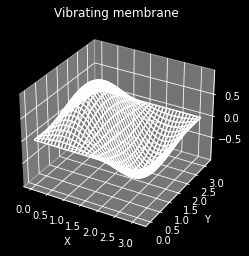

In [2]:
### VibratingMembrane.py, Notebook Version

import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d 

t=0                                    # initial time
den=390.0                              #density kg/m2
ten=180.0                              # tension N/m2
c=np.sqrt(ten/den)                     # propagation velocity
s5=np.sqrt(5)
N=32
t=0

def membrane(t,X,Y): # analytic solution vibrating membrane
    return np.cos(c * s5* t) * np.sin( 2* X)*np.sin(Y)  

plt.ion()                  # interactive on
fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs=np.linspace(0, np.pi,32)       # 0 to pi increm: pi/32
ys=np.linspace(0, np.pi,32)       # same
X, Y = np.meshgrid(xs,ys)         # define x,grid
Z = membrane(0, X, Y)             # initial condition t=0
wframe = None
ax.set_xlabel('X')                # name x axis
ax.set_ylabel('Y')
ax.set_title('Vibrating membrane')
for t in np.linspace(0,50,200):     #total time 10 divided by 40
    oldcol=wframe                  # previous frame
    Z=membrane(t,X,Y)              # membrane at t !=0
    wframe=ax.plot_wireframe(X,Y,Z)# plot the wireframe
    # Remove old frame before drawing
    if oldcol is not None:
        ax.collections.remove(oldcol)

    plt.draw() #plot new frame
print("finished")